<a href="https://colab.research.google.com/github/ajitkumarkp/ML/blob/master/Keras_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font style="color:rgb(50,120,229)">Import Libraries </font>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

## <font style="color:rgb(50,120,229)">Import the Data</font>
We will use CFIAR10- https://www.cs.toronto.edu/~kriz/cifar.html dataset and load_data function to load it into memory

In [2]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
labelMap = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## <font style="color:rgb(50,120,229)">Explore the Data</font>
Check out the number of images in training and test data and also the number of classes and some sample images

In [0]:
from tensorflow.keras.utils import to_categorical

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

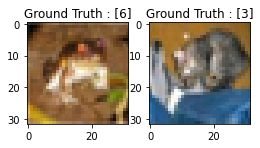

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,4])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:])
plt.title("Ground Truth : {}".format(test_labels[0]))


## <font style="color:rgb(50,120,229)">Preprocess the Data</font>
Perform normalization of data (i.e. convert the images to float and normalize the intensity values to lie between 0-1 and convert the labels to categorical variables to be used in Keras.

In [6]:
# Find the shape of input images and create the variable input_shape
nDims = 3
nRows,nCols = train_images.shape[1:3]
# print(nRows,nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols,nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols,nDims)
input_shape = (nRows, nCols,nDims)

print('Training data shape : ', train_data.shape)
print('Testing data shape : ', test_data.shape)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

Training data shape :  (50000, 32, 32, 3)
Testing data shape :  (10000, 32, 32, 3)


In [7]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## <font style="color:rgb(50,120,229)">Define the Model</font>
For implementing a CNN, we will stack up Convolutional Layers, followed by Max Pooling layers. We will also include Dropout to avoid overfitting. 

Finally, we will add a fully connected ( Dense ) layer followed by a softmax layer. Given below is the model structure.

We use 6 convolutional layers and 1 fully-connected layer. 
- The first 2 convolutional layers have 32 filters / kernels with a window size of 3×3. 
- The remaining conv layers have 64 filters. 
- We also add a max pooling layer with window size 2×2 after each pair of conv layer. 
- We add a dropout layer with a dropout ratio of 0.25 after every pooling layer. 
- In the final line, we add the dense layer which performs the classification among 10 classes using a softmax layer.

In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

## <font style="color:rgb(50,120,229)">Train the model</font>
We will employ the same Keras workflow that we learnt in the previous section. We create the model and use the `compile` and `fit` methods to train the network.

If we check the model summary we can see the shapes of each layer.

It shows that since we have used padding in the first layer, the output shape is same as the input ( 32×32 ). But the second conv layer shrinks by 2 pixels in both dimensions. Also, the output size after pooling layer decreases by half since we have used a stride of 2 and a window size of 2×2. The final droupout layer has an output of 2x2x64. This has to be converted to a single array. This is done by the flatten layer which converts the 3D array into a 1D array of size 2x2x64 = 256. The final layer has 10 nodes since there are 10 classes.

Since it is a 10 class classification problem, we will use a categorical cross entropy loss and use RMSProp optimizer to train the network. We will run it for 20 epochs.

In [9]:
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [10]:
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
# test_loss,test_accuracy = model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
196/196 [==============================] - 3s 18ms/step - loss: 2.0745 - accuracy: 0.2303 - val_loss: 1.7158 - val_accuracy: 0.3691
Epoch 2/20
196/196 [==============================] - 3s 16ms/step - loss: 1.7071 - accuracy: 0.3818 - val_loss: 1.4746 - val_accuracy: 0.4650
Epoch 3/20
196/196 [==============================] - 3s 16ms/step - loss: 1.5115 - accuracy: 0.4564 - val_loss: 1.4463 - val_accuracy: 0.4837
Epoch 4/20
196/196 [==============================] - 3s 16ms/step - loss: 1.3854 - accuracy: 0.5058 - val_loss: 1.3075 - val_accuracy: 0.5362
Epoch 5/20
196/196 [==============================] - 3s 16ms/step - loss: 1.2753 - accuracy: 0.5465 - val_loss: 1.2500 - val_accuracy: 0.5445
Epoch 6/20
196/196 [==============================] - 3s 16ms/step - loss: 1.1945 - accuracy: 0.5764 - val_loss: 1.1621 - val_accuracy: 0.5939
Epoch 7/20
196/196 [==============================] - 3s 16ms/step - loss: 1.1140 - accuracy: 0.6087 - val_loss: 1.1334 - val_accuracy: 0.6118

## <font style="color:rgb(50,120,229)">Check the loss and accuracy curves</font>
We use the history method while training to store the accuracy and loss values over the iterations. We plot the values to see how the network accuracy and loss changed while training.

In [11]:
print (len(history.history["loss"]))
print (history.history)


20
{'loss': [2.0744986534118652, 1.7071304321289062, 1.511489987373352, 1.3853778839111328, 1.2753440141677856, 1.194503903388977, 1.113972544670105, 1.0585886240005493, 1.0126118659973145, 0.9548241496086121, 0.9089421033859253, 0.8696683049201965, 0.8385996222496033, 0.8033668994903564, 0.7764439582824707, 0.748711884021759, 0.7250661849975586, 0.7092474102973938, 0.6852641701698303, 0.6657562255859375], 'accuracy': [0.23034000396728516, 0.38176000118255615, 0.45642000436782837, 0.5057799816131592, 0.5464800000190735, 0.5763599872589111, 0.6087200045585632, 0.6285799741744995, 0.6458399891853333, 0.6650599837303162, 0.6819400191307068, 0.696120023727417, 0.7081000208854675, 0.718779981136322, 0.7298600077629089, 0.739139974117279, 0.7492799758911133, 0.7552599906921387, 0.7604799866676331, 0.7687000036239624], 'val_loss': [1.715823769569397, 1.474590539932251, 1.4462703466415405, 1.3074899911880493, 1.2500218152999878, 1.162068486213684, 1.1334192752838135, 0.9514567255973816, 0.9168

Text(0.5, 1.0, 'Loss Curves')

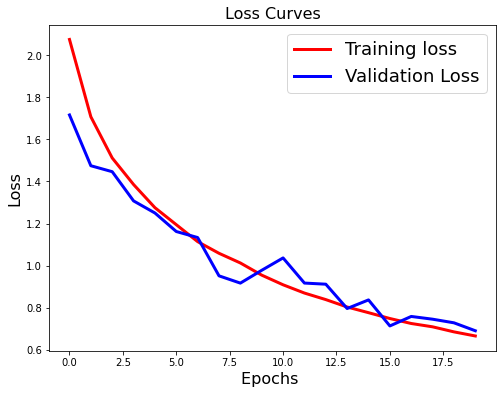

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

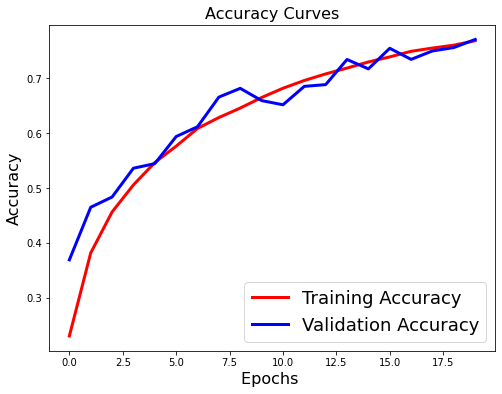

In [13]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


There is a considerable difference between the training and validation loss. This indicates that the network has tried to memorize the training data and thus, is able to get better accuracy on it. This is a sign of Overfitting. Dropout is already used in the network, but still there is overfitting. We will see if we can further reduce overfitting using something else.

## <font style="color:rgb(50,120,229)">Inference</font>


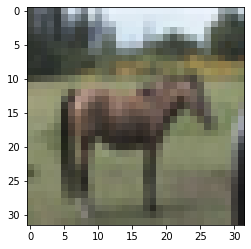

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Label = 7, Item = horse


In [14]:
testSample = test_data[9999,:]
plt.imshow(testSample.reshape(32,32,3));plt.show()

label = model1.predict_classes(testSample.reshape(1,32,32,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

> ### <font style="color:rgb(8,133,37)">output of the image that is shifted up</font>

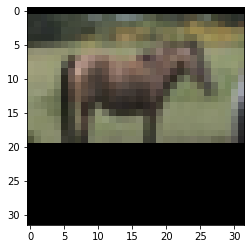

Label = 7, Item = horse


In [15]:
shiftUp = np.zeros(testSample.shape)
shiftUp[1:20,:] = testSample[6:25,:]
plt.imshow(shiftUp.reshape(32,32,3));plt.show()

label = model1.predict_classes(shiftUp.reshape(1,32,32,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

### <font style="color:rgb(8,133,37)">And for the image that is shifted Down?</font>

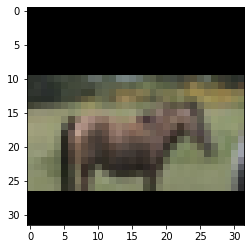

Label = 4, Item = deer


In [16]:
shiftDown = np.zeros(testSample.shape)
shiftDown[10:27,:] = testSample[6:23,:]
plt.imshow(shiftDown.reshape(32,32,3));plt.show()

label = model1.predict_classes(shiftDown.reshape(1,32,32,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))